In [1]:
import polars as pl
import polars.selectors as cs
import soccerdata as sd
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
import numpy as np
import pyarrow
import seaborn as sb
import bs4
import plotly.express as px
import math
import json
import os
import requests
from fontTools.misc.cython import returns
from mplsoccer import Pitch, FontManager, Sbopen, VerticalPitch

[02/11/26 13:35:41] INFO     No custom team name replacements found. You can configure these in       ]8;id=862311;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=591197;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_config.py#91\91]8;;\
                             C:\Users\User\soccerdata\config\teamname_replacements.json.                           

                    INFO     Custom league dict loaded from                                          ]8;id=199881;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=565681;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_config.py#195\195]8;;\
                             C:\Users\User\soccerdata\config\league_dict.json.                                     

In [2]:
# fm = sd.FotMob(leagues="ENG-Premier League", seasons="2025/2026")
ws = sd.WhoScored(leagues="ENG-Premier League", seasons=2025)
#match_stats = fm.read_team_match_stats(opponent_stats=True, team="Manchester United")
game_id = 1903338
game = ws.read_events(match_id=game_id)
loader = ws.read_events(game_id, output_fmt="loader")
df_players = loader.players(game_id=game_id)
game

[02/11/26 13:35:44] INFO     Saving cached data to C:\Users\User\soccerdata\data\WhoScored           ]8;id=238054;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=576587;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\_common.py#263\263]8;;\

[02/11/26 13:36:04] INFO     patching driver executable                                              ]8;id=592667;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\undetected_chromedriver\patcher.py\patcher.py]8;;\:]8;id=196114;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\undetected_chromedriver\patcher.py#346\346]8;;\
                             C:\Users\User\appdata\roaming\undetected_chromedriver\undetected_chrome               
                             driver.exe                                                                            

[02/11/26 13:36:35] INFO     Retrieving calendar for ENG-Premier League 2526                       ]8;id=606392;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=726492;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#374\374]8;;\

[02/11/26 13:36:48] INFO     [1/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=266079;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=260128;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:36:54] INFO     [2/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=985947;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=622554;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:37:01] INFO     [3/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=988625;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=236798;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:37:12] INFO     [4/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=602646;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=205759;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:37:21] INFO     [5/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=543324;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=236294;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:37:29] INFO     [6/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=671115;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=158350;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:37:38] INFO     [7/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=43702;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=962439;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:37:47] INFO     [8/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=776509;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=891464;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:37:56] INFO     [9/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=694359;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=231983;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:38:02] INFO     [10/10] Retrieving fixtures for ENG-Premier League 2526               ]8;id=438010;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=103663;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:38:11] WARNING  C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-package ]8;id=816316;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=505523;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             s\soccerdata\whoscored.py:427: FutureWarning: The behavior of                         
                             DataFrame concatenation with empty or all-NA entries is deprecated. In                
                             a future version, this will no longer exclude empty or all-NA columns                 
                             when determining the result dtypes. To retain the old behavior,                       
                             exclude the relevant entries before the concat operation.                             
                               pd.concat(all_schedules)                                                            
                                                                                                                   

                    INFO     [1/1] Retrieving game with id=1903338                                 ]8;id=490508;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=98264;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#695\695]8;;\

[02/11/26 13:38:24] INFO     Retrieving calendar for ENG-Premier League 2526                       ]8;id=721012;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=125896;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#374\374]8;;\

[02/11/26 13:38:33] INFO     [1/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=504341;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=231504;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:38:41] INFO     [2/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=840299;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=396533;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:38:51] INFO     [3/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=281559;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=758844;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:39:02] INFO     [4/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=79937;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=358355;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:39:10] INFO     [5/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=420569;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=771481;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:39:16] INFO     [6/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=156629;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=278507;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:39:25] INFO     [7/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=121110;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=445665;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:39:31] INFO     [8/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=702015;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=224469;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:39:40] INFO     [9/10] Retrieving fixtures for ENG-Premier League 2526                ]8;id=237466;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=700542;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:39:50] INFO     [10/10] Retrieving fixtures for ENG-Premier League 2526               ]8;id=169410;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=844486;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#403\403]8;;\

[02/11/26 13:39:57] WARNING  C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-package ]8;id=667635;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=208147;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             s\soccerdata\whoscored.py:427: FutureWarning: The behavior of                         
                             DataFrame concatenation with empty or all-NA entries is deprecated. In                
                             a future version, this will no longer exclude empty or all-NA columns                 
                             when determining the result dtypes. To retain the old behavior,                       
                             exclude the relevant entries before the concat operation.                             
                               pd.concat(all_schedules)                                                            
                                                                                                                   

                    INFO     [1/1] Retrieving game with id=1903338                                 ]8;id=728640;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=582786;file://C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\soccerdata\whoscored.py#695\695]8;;\

game_id  \
league             season game                                             
ENG-Premier League 2526   2026-02-10 West Ham-Manchester United  1903338   
                          2026-02-10 West Ham-Manchester United  1903338   
                          2026-02-10 West Ham-Manchester United  1903338   
                          2026-02-10 West Ham-Manchester United  1903338   
                          2026-02-10 West Ham-Manchester United  1903338   
...                                                                  ...   
                          2026-02-10 West Ham-Manchester United  1903338   
                          2026-02-10 West Ham-Manchester United  1903338   
                          2026-02-10 West Ham-Manchester United  1903338   
                          2026-02-10 West Ham-Manchester United  1903338   
                          2026-02-10 West Ham-Manchester United  1903338   

                                                                     period  \
league             season game                                                
ENG-Premier League 2526   2026-02-10 West Ham-Manchester United   FirstHalf   
                          2026-02-10 West Ham-Manchester United   FirstHalf   
                          2026-02-10 West Ham-Manchester United   FirstHalf   
                          2026-02-10 West Ham-Manchester United   FirstHalf   
                          2026-02-10 West Ham-Manchester United   FirstHalf   
...                                                                     ...   
                          2026-02-10 West Ham-Manchester United  SecondHalf   
                          2026-02-10 West Ham-Manchester United    PostGame   
                          2026-02-10 West Ham-Manchester United    PostGame   
                          2026-02-10 West Ham-Manchester United    PreMatch   
                          2026-02-10 West Ham-Manchester United    PreMatch   

                                                                 minute  \
league             season game                                            
ENG-Premier League 2526   2026-02-10 West Ham-Manchester United       0   
                          2026-02-10 West Ham-Manchester United       0   
                          2026-02-10 West Ham-Manchester United       0   
                          2026-02-10 West Ham-Manchester United       0   
                          2026-02-10 West Ham-Manchester United       0   
...                                                                 ...   
                          2026-02-10 West Ham-Manchester United      97   
                          2026-02-10 West Ham-Manchester United       0   
                          2026-02-10 West Ham-Manchester United       0   
                          2026-02-10 West Ham-Manchester United       0   
                          2026-02-10 West Ham-Manchester United       0   

                                                                 second  \
league             season game                                            
ENG-Premier League 2526   2026-02-10 West Ham-Manchester United     0.0   
                          2026-02-10 West Ham-Manchester United     0.0   
                          2026-02-10 West Ham-Manchester United     0.0   
                          2026-02-10 West Ham-Manchester United     3.0   
                          2026-02-10 West Ham-Manchester United     6.0   
...                                                                 ...   
                          2026-02-10 West Ham-Manchester United    53.0   
                          2026-02-10 West Ham-Manchester United     0.0   
                          2026-02-10 West Ham-Manchester United     0.0   
                          2026-02-10 West Ham-Manchester United     0.0   
                          2026-02-10 West Ham-Manchester United     0.0   

                                                                 expanded_minute  \
league      

In [27]:
from pyfonts import load_google_font

font = load_google_font("DotGothic16")


#パスネットワーク構築用function
def find_opp(df):
    teams = df['team'].sort_values().to_list()
    opposition = ''
    if teams[0] == 'Man Utd':
        return teams[-1]
    else:
        return teams[0]


def splitter(df):
    return_df = df[(df['type'] == 'Pass') & (df['outcome_type'] == 'Successful')]

    return_df['x'] *= 1.2
    return_df['end_x'] *= 1.2
    return_df['y'] *= 0.8
    return_df['end_y'] *= 0.8
    return_df.insert(1, "pass_angle",
    np.degrees(np.arctan2(
    return_df['end_y'] - return_df['y'],
    return_df['end_x'] - return_df['x']
    ))
    )
    return_df.insert(2, "pass_angle_abs",
    np.abs(return_df['pass_angle'])
    )
    return_df.insert(3, 'receiver',
    return_df['player_id'].shift(-1)
    )
    return return_df


def pass_comb(df):
    df['pos_min'] = df[['player_id', 'receiver']].min(axis=1)

    df['pos_max'] = df[['player_id', 'receiver']].max(axis=1)

    passing_comb = df.groupby(['pos_min', 'pos_max']).size().reset_index(name='pass_count')

    return passing_comb


def enhance_position(passdf, game_id, list_players):
    avg_locs = passdf.groupby('player_id').agg({
    'x': 'median',
    'y': 'median',
    'player_id': 'count'
    })
    avg_locs.columns = ['x_avg', 'y_avg', 'counts']
    avg_locs = avg_locs.merge(df_players, on='player_id', how='outer')
    return avg_locs


def team_metric(df, location, team_id):
    passes = df
    valid_pass = passes[
    (passes['pass_angle_abs'] >= 0) &
    (passes['pass_angle_abs'] <= 90)
    ]
    median_angle = valid_pass['pass_angle_abs'].median()
    verticality = round((1 - median_angle / 90) * 100, 2)
    center_backs = location[location['starting_position'] == 'DC']
    defense_line = center_backs['x_avg'].median() if len(center_backs) > 0 else 30

    attackers = location[location['starting_position'].isin(['FW', 'AMC'])]
    forward_line = attackers['x_avg'].mean() if len(attackers) > 0 else 90
    team_median = location['x_avg'].median()

    return {
    'verticality': verticality,
    'defense_line': defense_line,
    'forward_line': forward_line,
    'team_median': team_median
    }


def plotter(ax, passes_df, avg_locs, pass_combinations, team_metrics,
team_name, color='blue', bg_color='#0C0D0E'):
    pitch = Pitch(pitch_type='statsbomb', line_color='white', pitch_color=bg_color, linewidth=1)


    pitch.draw(ax=ax)
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_facecolor(bg_color)

    combinations = pass_combinations.merge(
    avg_locs[['x_avg', 'y_avg', 'player_name', 'player_id']],
    left_on='pos_min', right_on='player_id'
    ).merge(
    avg_locs[['x_avg', 'y_avg', 'player_name', 'player_id']],
    left_on='pos_max', right_on='player_id',
    suffixes=['', '_end']
    )

    max_passes = combinations['pass_count'].max()
    combinations['line_width'] = (combinations['pass_count'] / max_passes) * 15
    combinations['alpha'] = 0.3 + (combinations['pass_count'] / max_passes) * 0.6

    for _, row in combinations.iterrows():
        pitch.lines(row['x_avg'], row['y_avg'], row['x_avg_end'], row['y_avg_end'],lw=row['line_width'], color=color, alpha=row['alpha'], ax=ax, zorder=1)

    defense_line = team_metrics['defense_line']
    forward_line = team_metrics['forward_line']
    team_median = team_metrics['team_median']

    ax.axvline(x=defense_line, color='lightgray', linestyle='dotted', alpha=0.6, linewidth=2, zorder=2)
    ax.axvline(x=forward_line, color='lightgray', linestyle='dotted', alpha=0.6, linewidth=2, zorder=2)
    ax.axvline(x=team_median, color='lightgray', linestyle='--', alpha=0.8, linewidth=2, zorder=2)

    min_line = min(defense_line, forward_line)
    max_line = max(defense_line, forward_line)
    ymid = [0, 0, 80, 80]
    xmid = [min_line, max_line, max_line, min_line]
    ax.fill(xmid, ymid, color, alpha=0.1, zorder=0)

    for player_id, row in avg_locs.iterrows():
        marker = 'o' if row['is_starter'] else 's'
        pitch.scatter(row['x_avg'], row['y_avg'], s=1200, marker=marker,color='white', edgecolors=color, linewidth=3, ax=ax, zorder=3)

    ax.text(row['x_avg'], row['y_avg'], str(row['jersey_number']),
    ha='center', va='center', font=font, fontsize=14, color=color, weight='bold', zorder=4)

    ax.text(115, 75, "○ = starter\n□ = substitute",
    fontsize=11, ha='right', va='top', color='white',
    bbox=dict(boxstyle="round,pad=0.3", facecolor=bg_color, edgecolor='white', alpha=0.8))
    ax.text(10, -8, f"Verticality: {team_metrics['verticality']}%",
    font=font, fontsize=12, ha='left', color='white', weight='bold')
    ax.text(70, -8, f"Median: {team_metrics['team_median']:.1f}m",
    font=font, fontsize=12, ha='left', color='white', weight='bold')

    ax.set_title(f"{team_name} - Passing Network", font=font, fontsize=14, color='white')

#ショットマップ作成

In [28]:
def shotmap_gen(match):
    DIR = 'utd_games'

    game_shots = match

    shots_df = game_shots[
    ['minute', 'second', 'team', 'x', 'y', 'is_shot', 'is_goal', 'blocked_x', 'blocked_y', 'goal_mouth_y',
    'goal_mouth_z']]
    shots_df = shots_df[shots_df['is_shot'] == True]
    shots_df

    teams = shots_df['team'].sort_values().to_list()
    opposition = ''
    if teams[0] == 'Man Utd':
        opposition = teams[-1]
    else:
        opposition = teams[0]

    man_utd_shots_df = shots_df[shots_df['team'] == 'Man Utd']

    opposition_shots_df = shots_df[shots_df['team'] == opposition]


    mutd_g_df = man_utd_shots_df[man_utd_shots_df['is_goal'] == True]
    mutd_ng_df = man_utd_shots_df[man_utd_shots_df['is_goal'] != True]

    opposition_g_df = opposition_shots_df[opposition_shots_df['is_goal'] == True]
    opposition_ng_df = opposition_shots_df[opposition_shots_df['is_goal'] != True]

    pitch = Pitch(pitch_type='opta',half=True, goal_type='box', goal_alpha=0.8)
    fig, ax = pitch.draw(figsize=(10, 8))
    fig.patch.set_facecolor('black')
    United_sc_g = pitch.scatter(mutd_g_df['x'], mutd_g_df['y'], marker="*", c='red', ax=ax, linewidth=3)
    United_sc_g = pitch.scatter(mutd_ng_df['x'], mutd_ng_df['y'], marker="o", c='white', ax=ax, linewidth=3)

    fig.text(s=f"Manchester United ショットマップ", x=0.05, y=0.96, font=font, fontsize=22, fontweight="bold")

#試合スタッツ作成
(fotmob用API周りのメンテ中)

In [ ]:
"""fm = sd.FotMob(leagues="ENG-Premier League", seasons="2025/2026")
match_stats = fm.read_team_match_stats(opponent_stats=True, team="Manchester United")
match_stats
lists = []
for i in range(43):
if i != 0:
lists.append(str(i))
match_stats.insert(0, 'game_count', lists)
n = 2
match_stats['game_count'] = [int(i/n) for i,x in enumerate(match_stats['game_count'])]
match_week = 20
game_copy = match_stats[match_stats['game_count'] == 20]
game_copy = game_copy.droplevel('league')
game_copy = game_copy.droplevel('season')
game_copy = game_copy.droplevel('game')
lists = []
for row in game_copy:
lists.append(row)
teams = game_copy.index.values
game_copy['Team'] = teams
game_copy.set_index('game_count', inplace=True)
game_copy

import matplotlib.pyplot as plt
import numpy as np

teams = game_copy['Team'].to_list()

category_names = [teams[0], teams[1]]
results = {
'Ball possession': game_copy['Ball possession'].to_list(),
'Accurate Passes': game_copy['Accurate passes'].to_list(),
'Accurate Passes (%)': game_copy['Accurate passes (%)'].to_list(),
'Total shots': game_copy['Total shots'].to_list(),
'Shots on Target': game_copy['Shots on target'].to_list(),
'Expected goals (xG)': game_copy['Expected goals (xG)'].to_list(),
'Big chances': game_copy['Big chances'].to_list(),
'Big chances missed': game_copy['Big chances missed'].to_list()
}

results
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pyfonts import load_google_font

warnings.filterwarnings('ignore')

font = load_google_font("DotGothic16")

team_names = list(game_copy['Team'].unique())
team_colors = ['#EF0107', '#DA291C']

categories = [
'Ball possession', 'Accurate passes', 'Accurate passes (%)',
'Total shots', 'Shots on target', 'Expected goals (xG)',
'Big chances', 'Big chances missed', 'Corners', 'Fouls committed'
]

カテゴリ = [
'ポゼッション率', 'パス成功数', 'パス成功率', 'シュート数', 'シュート数(枠内)', 'xG', 'ビッグチャンス',
'ビッグチャンス(ミス)', 'コーナー', 'ファウル'
]

team_a_data = [float(game_copy.iloc[0][cat]) for cat in categories]
team_b_data = [float(game_copy.iloc[1][cat]) for cat in categories]

print()

fig, ax = plt.subplots(figsize=(10, 8), dpi=150)
y_pos = np.arange(len(categories))

for i, (a_val, b_val) in enumerate(zip(team_a_data, team_b_data)):
total = a_val + b_val
if total == 0: total = 1

a_len = a_val / total
b_len = b_val / total

ax.barh(i, a_len, color='blue', left=-a_len, height=0.6)

ax.barh(i, b_len, color='red', left=0, height=0.6)

if a_len > 0:
ax.text(-a_len - 0.05, i, str(a_val), ha='right', va='center', font=font, fontweight='bold')
else:
ax.text(-0.5, i, str(a_val), ha='right', va='center', font=font, fontweight='bold')
if b_len > 0:
ax.text(b_len + 0.05, i, str(b_val), ha='left', va='center', font=font, fontweight='bold')
else:
ax.text(0.5, i, str(b_val), ha='right', va='center', font=font, fontweight='bold')

for i, cat in enumerate(カテゴリ):
ax.text(0, i, cat, ha='center', va='center', bbox=dict(facecolor='black', edgecolor='none', alpha=0.7), font=font,
fontweight='bold')

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1, len(categories))
ax.axis('off')

plt.title(f"{team_names[0]} (左) vs {team_names[1]} (右)", font=font, fontsize=14, pad=20)
plt.show()"""



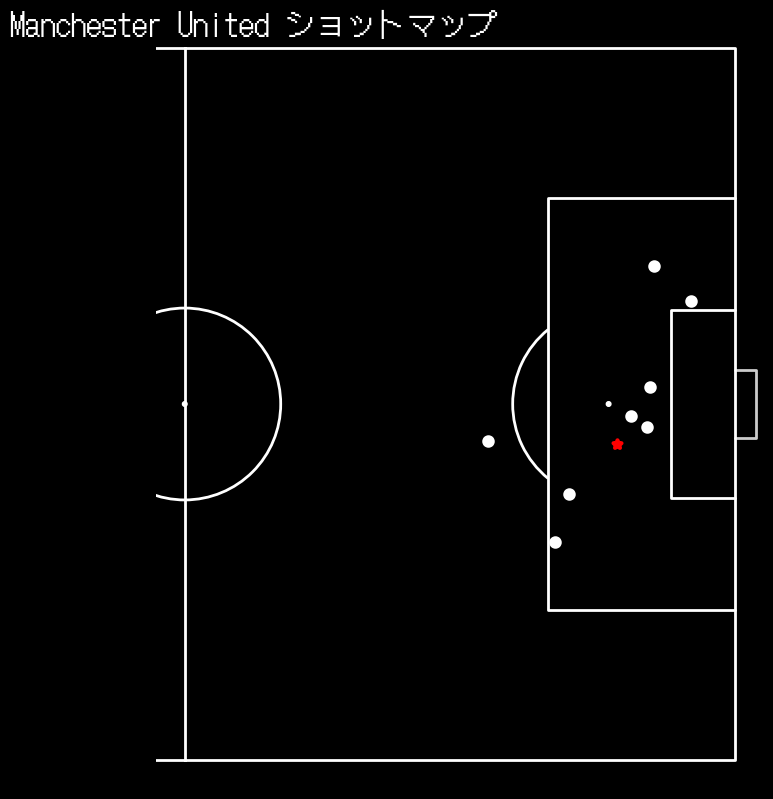

In [29]:

shotmap_gen(game)

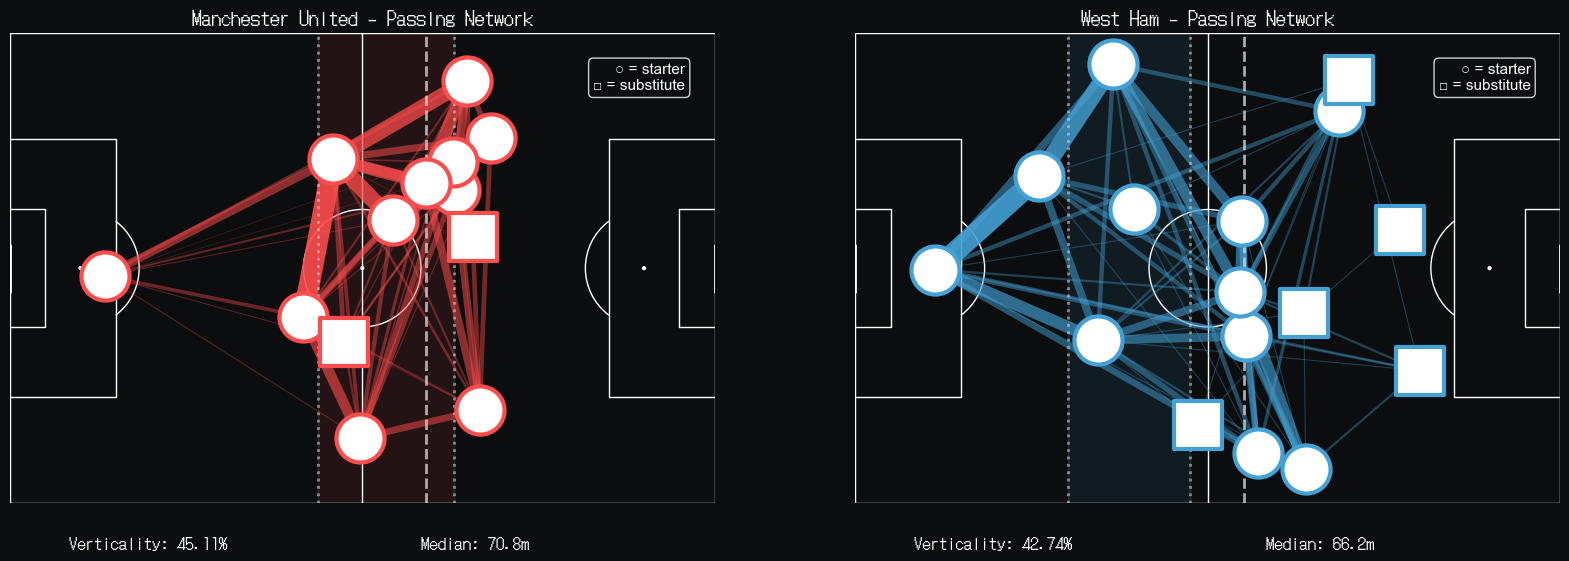

In [7]:
import warnings

warnings.filterwarnings('ignore')

pass_df = game[['team', 'player', 'player_id', 'minute', 'type', 'outcome_type', 'second', 'x', 'y', 'end_x', 'end_y']]

opposition = find_opp(pass_df)
mutd_df = pass_df[pass_df['team'] == 'Man Utd']
opposition_df = pass_df[pass_df['team'] == opposition]

mutd_pass_df = splitter(mutd_df)
opposition_pass_df = splitter(opposition_df)

mutd_pass_comb = pass_comb(mutd_pass_df)
opposition_pass_comb = pass_comb(opposition_pass_df)

mutd_avg_location = enhance_position(mutd_pass_df, game_id, mutd_pass_comb)
opposition_avg_location = enhance_position(opposition_pass_df, game_id, opposition_pass_comb)

mutd_team_metric = team_metric(mutd_pass_df, mutd_avg_location, game_id)
opposition_team_metric = team_metric(opposition_pass_df, opposition_avg_location, game_id)

# THE ATHLETIC STYLING
background_color = '#0C0D0E' # The Athletic's dark background
home_color = '#FF4C4C'
away_color = '#43A1D5'

# Plot with Athletic styling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.patch.set_facecolor(background_color) # Dark background for entire figure

plotter(ax1, mutd_df, mutd_avg_location, mutd_pass_comb, mutd_team_metric,
'Manchester United', color=home_color, bg_color=background_color)

plotter(ax2, opposition_df, opposition_avg_location, opposition_pass_comb, opposition_team_metric,
opposition, color=away_color, bg_color=background_color)

